In [1]:

!pip install bnlp_toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.5 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=06e54a8d2dbc0d03ec60fb8075dcaab96aa1b3bc13133f846709c152f85c17a2
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.10.0
    Uninstalling emoji-2.10.0:
      Successfully uninstalled emoji-2.10.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bnlp import NLTKTokenizer
from bs4 import BeautifulSoup
from bnlp import BengaliCorpus as corpus
import re
#from bangla_stemmer.stemmer import stemmer

In [3]:
df_train = pd.read_excel("/kaggle/input/sentnob-tdc-clean/sentnob_train.xlsx")

In [4]:
df_train.rename(columns = {'Text':'Data'}, inplace = True)

In [5]:
df_train.dropna(inplace=True)

In [6]:
df_train.head()

,Data,Label
0,মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...,1
1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তা...,2
2,ভাই আপনার কথাই যাদু রয়েছে,1
3,উওরটা আমার অনেক ভালো লেগেছে,1
4,আমার নিজের আমার নিয়ে কি সাজেক যেতে অনেক না? প...,0


In [7]:
longest_string = max(df_train["Data"], key=len)
print(len(longest_string))

374


In [8]:
df_train['Label'].value_counts()

Label
1    5133
2    4548
0    2894
Name: count, dtype: int64

In [9]:
df_train['Label'] = df_train['Label'].replace({0: 'Neutral', 1: 'Positive', 2: 'Negative'})

In [10]:
df_val = pd.read_excel("/kaggle/input/sentnob-tdc-clean/sentnob_val.xlsx")
df_val.rename(columns = {'Text':'Data'}, inplace = True)

In [11]:
df_val.dropna(inplace=True)

In [12]:
df_val['Label'].value_counts()

Label
1    623
2    590
0    354
Name: count, dtype: int64

In [13]:
df_val['Label'] = df_val['Label'].replace({0: 'Neutral', 1: 'Positive', 2: 'Negative'})

In [14]:
df_val['Label'].value_counts()

Label
Positive    623
Negative    590
Neutral     354
Name: count, dtype: int64

In [15]:
def rem_symbol_punct(text):
    pattern = re.compile('[!@#$%^&*()_+-={}\[\];:\'\"\|<>,.///?`~।]', flags=re.I)
    return pattern.sub(r'', text)


def remove_html_and_urls(text):
    # Remove HTML tags
    soup = BeautifulSoup(text, "html.parser")
    text_without_html = soup.get_text()

    # Remove URLs
    text_without_urls = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text_without_html)

    return text_without_urls


def remove_emojis(text):
    # Emoji patterns for different Unicode ranges
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
        "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
        "\U0001F700-\U0001F77F"  # Alphanumeric Supplement
        "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Chess Symbols
        "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        "\U00002702-\U000027B0"  # Dingbat symbols
        "\U000024C2-\U0001F251" 
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r'', text)


#remove noise
def Remove_text(text):
    text = rem_symbol_punct(text)
    text = remove_html_and_urls(text)
    text = remove_emojis(text)
    return text

In [16]:
df_train['Data'] = df_train['Data'].apply(Remove_text)
df_val['Data'] = df_val['Data'].apply(Remove_text)

In [17]:
longest_string = max(df_train["Data"], key=len)
print(len(longest_string))

372


In [18]:
df_train

,Data,Label
0,মুগ্ধ হয়ে গেলাম মামু আর তোমায় কি কমু বলো তোমায়...,Positive
1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তা...,Negative
2,ভাই আপনার কথাই যাদু রয়েছে,Positive
3,উওরটা আমার অনেক ভালো লেগেছে,Positive
4,আমার নিজের আমার নিয়ে কি সাজেক যেতে অনেক না প্...,Neutral
...,...,...
12570,বর্ডারে অনেক লেট হয়ে যাওয়াতে আমরা জিপে করে চল...,Positive
12571,আমার সোনার বাংলা এমন রক্ষক নামের পৌঁছানো কোনো...,Negative
12572,ওনারা এত এত ও এত সুন্দর পরিবেশে রান্না করে এ...,Positive
12573,বাংলাদেশ আমরা পুলিশ চাই না এই ধরনে পুলিশ দরকা...,Negative


In [19]:
df_train['Data']

0        মুগ্ধ হয়ে গেলাম মামু আর তোমায় কি কমু বলো তোমায়...
1         এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তা...
2                               ভাই আপনার কথাই যাদু রয়েছে 
3                             উওরটা আমার অনেক ভালো লেগেছে 
4         আমার নিজের আমার নিয়ে কি সাজেক যেতে অনেক না প্...
                               ...                        
12570     বর্ডারে অনেক লেট হয়ে যাওয়াতে আমরা জিপে করে চল...
12571     আমার সোনার বাংলা এমন রক্ষক নামের পৌঁছানো কোনো...
12572      ওনারা এত এত ও এত সুন্দর পরিবেশে রান্না করে এ...
12573     বাংলাদেশ আমরা পুলিশ চাই না এই ধরনে পুলিশ দরকা...
12574          বসুন্ধরা শাখার হাজি বিরিয়ানি একবারেই ফালতু 
Name: Data, Length: 12575, dtype: object

In [20]:
longest_string = max(df_train["Data"], key=len)
print(len(longest_string))

372


In [21]:
df_train['Data'] 

0        মুগ্ধ হয়ে গেলাম মামু আর তোমায় কি কমু বলো তোমায়...
1         এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তা...
2                               ভাই আপনার কথাই যাদু রয়েছে 
3                             উওরটা আমার অনেক ভালো লেগেছে 
4         আমার নিজের আমার নিয়ে কি সাজেক যেতে অনেক না প্...
                               ...                        
12570     বর্ডারে অনেক লেট হয়ে যাওয়াতে আমরা জিপে করে চল...
12571     আমার সোনার বাংলা এমন রক্ষক নামের পৌঁছানো কোনো...
12572      ওনারা এত এত ও এত সুন্দর পরিবেশে রান্না করে এ...
12573     বাংলাদেশ আমরা পুলিশ চাই না এই ধরনে পুলিশ দরকা...
12574          বসুন্ধরা শাখার হাজি বিরিয়ানি একবারেই ফালতু 
Name: Data, Length: 12575, dtype: object

In [22]:
X_train  =  df_train['Data'].values.tolist()
y_train = df_train['Label'].tolist()

In [23]:
X_test =  df_val['Data'].values.tolist()
y_test = df_val['Label'].tolist()

In [24]:
pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 36.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 47.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 30.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 13.4 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.40.0-py3-none-any.whl size=25319454 sha256=f470ef99e7c5c5405f9a4ce3466a9ef5acf511d0f250324f88aad0ec5eb274fa
  Stored in directory: /roo

In [25]:
import ktrain
from ktrain import text
MODEL_NAME = 'csebuetnlp/banglabert'
t = text.Transformer(MODEL_NAME, maxlen=500)

config.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

In [26]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 14
	95percentile : 33
	99percentile : 42


tokenizer_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/528k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 15
	95percentile : 33
	99percentile : 42


In [27]:
print(trn)

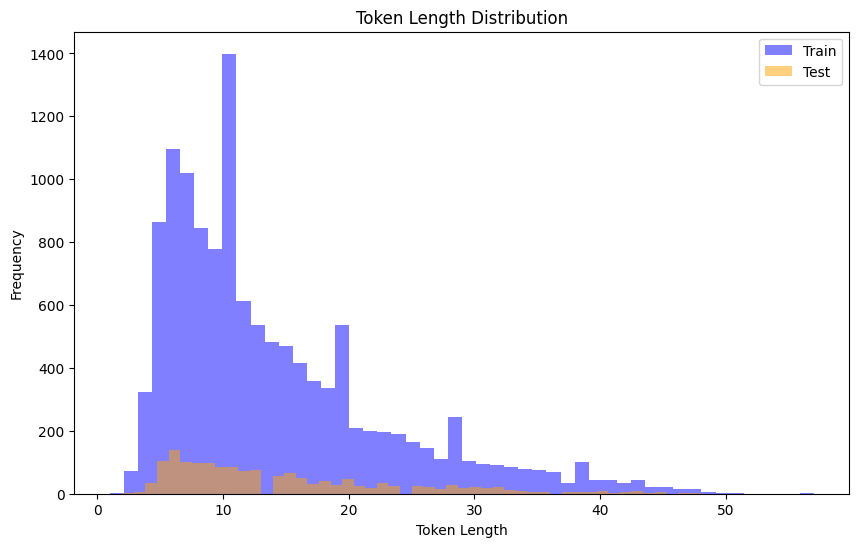

In [28]:
import matplotlib.pyplot as plt

# Calculate token lengths for train and test datasets
train_token_lengths = [len(t.split()) for t in X_train]
test_token_lengths = [len(t.split()) for t in X_test]

# Plot token length distribution
plt.figure(figsize=(10, 6))
plt.hist(train_token_lengths, bins=50, alpha=0.5, color='blue', label='Train')
plt.hist(test_token_lengths, bins=50, alpha=0.5, color='orange', label='Test')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

In [29]:
model = t.get_classifier()

In [30]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [31]:
# Adding early stopping callback from TensorFlow
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', patience=5, mode='auto')

In [32]:
history = learner.fit_onecycle(2e-5, 10,callbacks=[early_stopping])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
1572/1572 [==============================] - 914s 565ms/step - loss: 0.8797 - accuracy: 0.6030 - val_loss: 0.7516 - val_accuracy: 0.6752
Epoch 2/10
1572/1572 [==============================] - 884s 563ms/step - loss: 0.6840 - accuracy: 0.7140 - val_loss: 0.6986 - val_accuracy: 0.7167
Epoch 3/10
1572/1572 [==============================] - 884s 562ms/step - loss: 0.5649 - accuracy: 0.7717 - val_loss: 0.6877 - val_accuracy: 0.7269
Epoch 4/10
1572/1572 [==============================] - 883s 562ms/step - loss: 0.4305 - accuracy: 0.8367 - val_loss: 0.7224 - val_accuracy: 0.7294
Epoch 5/10
1572/1572 [==============================] - 883s 562ms/step - loss: 0.3206 - accuracy: 0.8835 - val_loss: 0.9248 - val_accuracy: 0.7141
Epoch 6/10
1572/1572 [==============================] - 883s 562ms/step - loss: 0.2266 - accuracy: 0.9219 - val_loss: 0.8959 - val_accuracy: 0.7307
Epoch 7/10
1572/1572 [===========================

In [33]:
# Save the trained model
learner.save_model('/kaggle/output/model.zip')

In [34]:
classes=t.get_classes()

In [35]:
cm = learner.validate(class_names=t.get_classes())

49/49 [==============================] - 7s 89ms/step
              precision    recall  f1-score   support

    Negative       0.80      0.76      0.78       590
     Neutral       0.52      0.54      0.53       354
    Positive       0.76      0.79      0.78       623

    accuracy                           0.72      1567
   macro avg       0.70      0.70      0.70      1567
weighted avg       0.72      0.72      0.72      1567



In [36]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [37]:
!zip -r mental.zip /kaggle/output/model

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


	zip warning: name not matched: /kaggle/output/model

zip error: Nothing to do! (try: zip -r mental.zip . -i /kaggle/output/model)


In [38]:
!ls

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


__notebook__.ipynb


In [39]:
# from IPython.display import FileLink
# FileLink(r'/kaggle/working/mental-health-rand.zip')

In [40]:
# df_cm = pd.DataFrame(cm, index=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "],
#                      columns=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "])
# plt.figure(figsize = (10,7))
# sns.heatmap(df_cm,annot=True, fmt ="d")